<a href="https://colab.research.google.com/github/Julianpucheta/CODE2022/blob/main/Clase_01_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo de Tabla 1 1

Para poner explicaciones.

In [2]:
!apt install octave

Reading package lists... Done
Building dependency tree       
Reading state information... Done
octave is already the newest version (4.2.2-1ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


Ya instalado el Octave en el entorno, ahora generamos los archivos .m que van a correr la simulación.

In [6]:
%%writefile Tabla_1_1.m
warning('off','all');
clear;%close all;
X=-[0; 0];ii=0;t_etapa=1e-7;wRef=2;tF=.001;
%Constantes del PID
Kp=.500;Ki=0.001;Kd=0.00001;color_='r';
% Kp=1;Ki=0;Kd=0.0001;color_='k';
% Kp=10;Ki=0;Kd=0;color_='b';
Ts=t_etapa;
A1=((2*Kp*Ts)+(Ki*(Ts^2))+(2*Kd))/(2*Ts);
B1=(-2*Kp*Ts+Ki*(Ts^2)-4*Kd)/(2*Ts);
C1=Kd/Ts;
e=zeros(tF/t_etapa,1);u=0;
for t=0:t_etapa:tF
  ii=ii+1;k=ii+2;
  X=modmotor(t_etapa, X, u);
  e(k)=wRef-X(1); %ERROR
  u=u+A1*e(k)+B1*e(k-1)+C1*e(k-2); %PID
  x1(ii)=X(1);%Omega
  x2(ii)=X(2);%wp
  acc(ii)=u;
end
t=0:t_etapa:tF;
hfig1 = figure(1); set(hfig1, 'Visible', 'off');
subplot(2,1,1);hold on;
plot(t,x1,color_);title('Salida y, \omega_t');
subplot(2,1,2);hold on;
plot(t,acc,color_);title('Entrada u_t, v_a');
xlabel('Tiempo [Seg.]');
print(hfig1,'omega_t','-dpng');
% % Para verificar
% Laa=366e-6;
% J=5e-9;
% Ra=55.6;
% B=0;
% Ki=6.49e-3;
% Km=6.53e-3;
% num=[Ki]
save('Tabla_1_1.mat','-v7')

Overwriting Tabla_1_1.m


In [4]:
%%writefile modmotor.m
function [X]=modmotor(t_etapa, xant, accion)
Laa=366e-6; J=5e-9;Ra=55.6;B=0;Ki=6.49e-3;Km=6.53e-3;
Va=accion;
h=1e-7;
omega= xant(1);
wp= xant(2);
for ii=1:t_etapa/h
  wpp =(-wp*(Ra*J+Laa*B)-omega*(Ra*B+Ki*Km)+Va*Ki)/(J*Laa);
  wp=wp+h*wpp;
  omega = omega + h*wp;
end
X=[omega,wp];

Writing modmotor.m


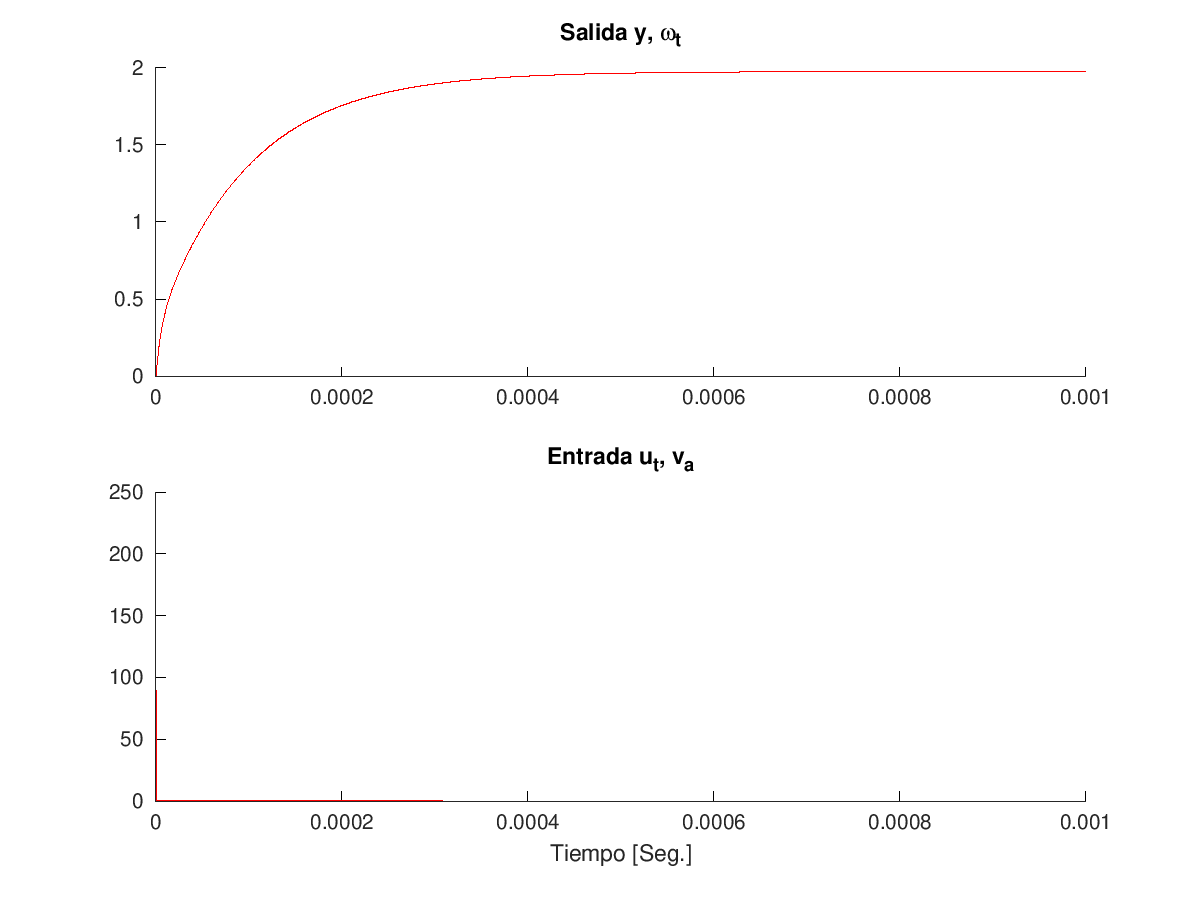

In [7]:
!octave -W Tabla_1_1.m
from PIL import Image
imt = Image.open("/content/omega_t.png")
imt